In [165]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset: 

In [208]:
data = pd.read_csv("airnb.csv")
data.head(5)

,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed
0,"Chalet in Skykomish, Washington, US",Sky Haus - A-Frame Cabin,Jun 11 - 16,306.00,229.00,4.85 (531),4 beds
1,"Cabin in Hancock, New York, US",The Catskill A-Frame - Mid-Century Modern Cabin,Jun 6 - 11,485.00,170.00,4.77 (146),4 beds
2,"Cabin in West Farmington, Ohio, US",The Triangle: A-Frame Cabin for your city retreat,Jul 9 - 14,119.00,522.00,4.91 (515),4 beds
3,"Home in Blue Ridge, Georgia, US",*Summer Sizzle* 5 Min to Blue Ridge* Pets* Hot...,Jun 11 - 16,192.00,348.00,4.94 (88),5 beds
4,"Treehouse in Grandview, Texas, US",Luxury Treehouse Couples Getaway w/ Peaceful V...,Jun 4 - 9,232.00,196.00,4.99 (222),1 queen bed


In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   953 non-null    object
 1   Detail                  953 non-null    object
 2   Date                    953 non-null    object
 3   Price(in dollar)        953 non-null    object
 4   Offer price(in dollar)  166 non-null    object
 5   Review and rating       947 non-null    object
 6   Number of bed           953 non-null    object
dtypes: object(7)
memory usage: 52.2+ KB


In [210]:
data.isna().sum()

Title                       0
Detail                      0
Date                        0
Price(in dollar)            0
Offer price(in dollar)    787
Review and rating           6
Number of bed               0
dtype: int64

In [211]:
data.shape

(953, 7)

In [212]:
data.size

6671

In [213]:
data.describe()

,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed
count,953,953,953,953,166,947,953
unique,756,839,204,322,108,754,33
top,"Apartment in Kuala Lumpur, Malaysia",Cozy room 48.5 sq.m @The Astra near Night market,May 1 - 6,111.00,66.00,New,2 beds
freq,7,3,219,13,4,16,221


# Data Cleaning:

In [214]:
data['Review and rating']= data['Review and rating'].replace('New',np.nan)


In [215]:
data['Review and rating']= data['Review and rating'].fillna(data['Review and rating'].mode())
data['Review and rating']= data['Review and rating'].fillna(data['Review and rating'].ffill(axis=0))

In [216]:
data.isnull().sum()

Title                       0
Detail                      0
Date                        0
Price(in dollar)            0
Offer price(in dollar)    787
Review and rating           0
Number of bed               0
dtype: int64

In [217]:
# Clean the 'Price(in dollar)' and 'Offer price(in dollar)' columns
data['Price(in dollar)'] = data['Price(in dollar)'].replace({',': '', '$': ''}, regex=True).astype(float)
data['Offer price(in dollar)'] = data['Offer price(in dollar)'].replace({',': '', '$': ''}, regex=True).astype(float)

In [218]:
data['Offer price(in dollar)'] = data['Offer price(in dollar)'].fillna(data['Offer price(in dollar)'].median())


# Remove Duplicates

In [219]:
# Check the duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicates: {duplicates}")


Number of duplicates: 34


In [220]:
# Remove duplicates
data = data.drop_duplicates()

# Identify and manage outliers using statistical methods or visualizations.

In [221]:
data.head(5)

,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed
0,"Chalet in Skykomish, Washington, US",Sky Haus - A-Frame Cabin,Jun 11 - 16,306.0,229.0,4.85 (531),4 beds
1,"Cabin in Hancock, New York, US",The Catskill A-Frame - Mid-Century Modern Cabin,Jun 6 - 11,485.0,170.0,4.77 (146),4 beds
2,"Cabin in West Farmington, Ohio, US",The Triangle: A-Frame Cabin for your city retreat,Jul 9 - 14,119.0,522.0,4.91 (515),4 beds
3,"Home in Blue Ridge, Georgia, US",*Summer Sizzle* 5 Min to Blue Ridge* Pets* Hot...,Jun 11 - 16,192.0,348.0,4.94 (88),5 beds
4,"Treehouse in Grandview, Texas, US",Luxury Treehouse Couples Getaway w/ Peaceful V...,Jun 4 - 9,232.0,196.0,4.99 (222),1 queen bed


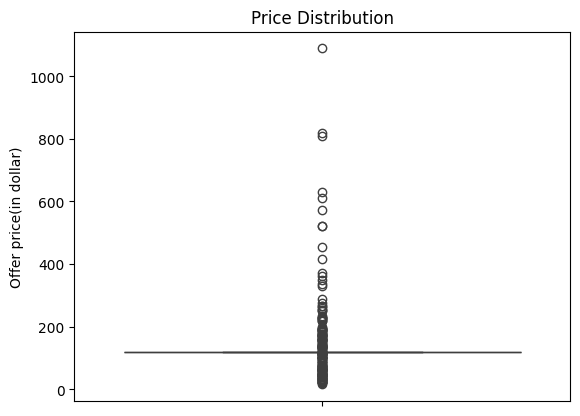

In [222]:
# Histogram for 'price'
sns.boxplot(data['Offer price(in dollar)'])
plt.title('Price Distribution')
plt.show()

In [223]:
data.describe()

,Price(in dollar),Offer price(in dollar)
count,919.000000,919.000000
mean,171.696409,125.784548
std,142.093744,66.403134
min,16.000000,16.000000
25%,85.000000,119.000000
50%,135.000000,119.000000
75%,220.500000,119.000000
max,1463.000000,1089.000000


In [224]:
Q1 = data['Offer price(in dollar)'].quantile(0.25)
Q3 = data['Offer price(in dollar)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with outliers
data = data[(data['Offer price(in dollar)'] >= lower_bound) & (data['Offer price(in dollar)'] <= upper_bound)]


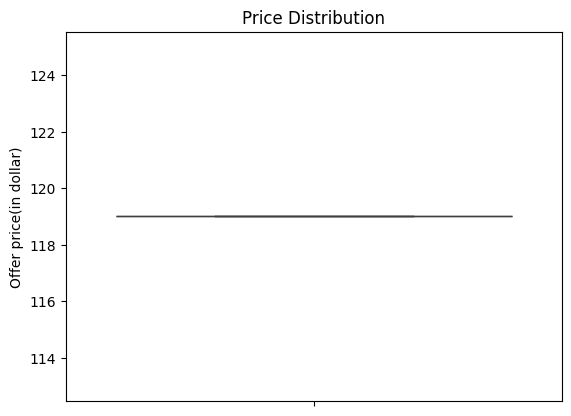

In [225]:
# Histogram for 'price'
sns.boxplot(data['Offer price(in dollar)'])
plt.title('Price Distribution')
plt.show()

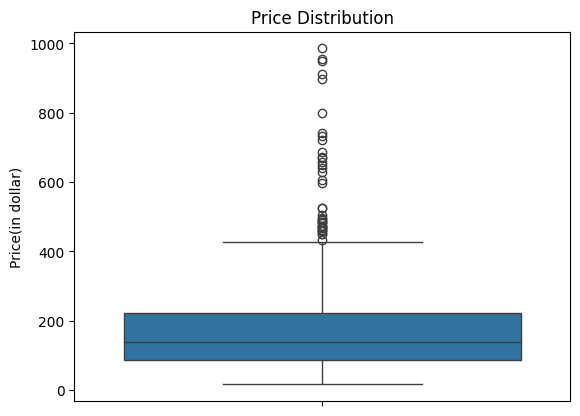

In [226]:
sns.boxplot(data['Price(in dollar)'])
plt.title('Price Distribution')
plt.show()

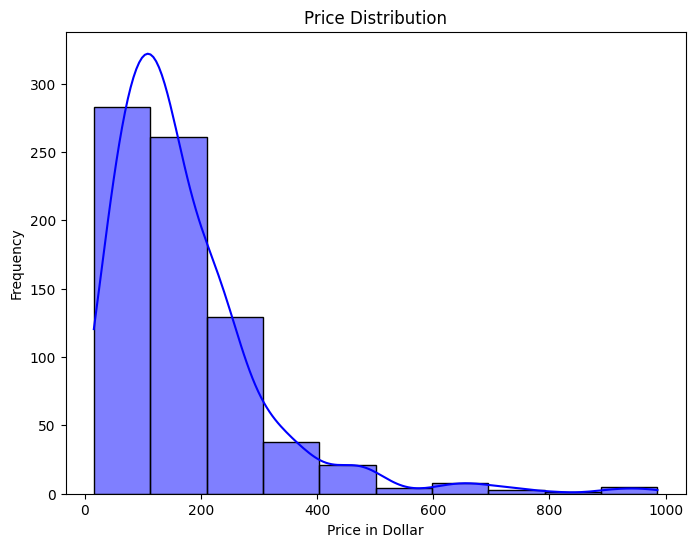

In [227]:
# Histogram for 'Price(in dollar)'
plt.figure(figsize=(8, 6))
sns.histplot(data['Price(in dollar)'], kde=True, bins=10, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price in Dollar')
plt.ylabel('Frequency')
plt.show()

In [233]:
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(data['Price(in dollar)'])
abs_z_scores = abs(z_scores)

# Remove rows with Z-scores > 3 (outliers)
data = data[abs_z_scores < 3]


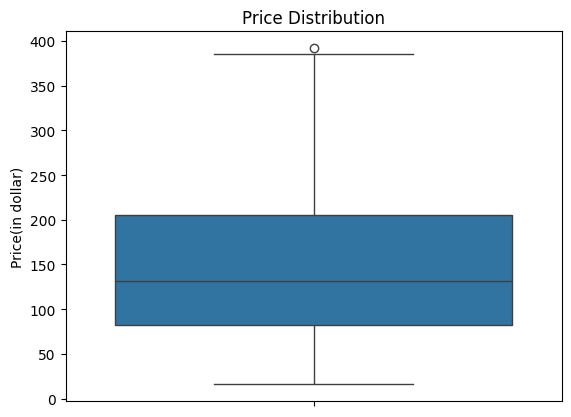

In [234]:
sns.boxplot(data['Price(in dollar)'])
plt.title('Price Distribution')
plt.show()

In [237]:
# Convert the 'Number of bed' column to string first, then extract the numeric part
data['Number of bed'] = data['Number of bed'].astype(str).str.extract('(\d+)')

# Convert the extracted values to integers
data['Number of bed'] = data['Number of bed'].astype(int)
data['Number of bed'].head(5)



<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Star\AppData\Local\Temp\ipykernel_1780\475532226.py:2: SyntaxWarning: invalid escape sequence '\d'
  data['Number of bed'] = data['Number of bed'].astype(str).str.extract('(\d+)')


7     2
8     2
9     3
10    2
11    2
Name: Number of bed, dtype: int64

In [238]:
data.sample(5)

,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed
23,"Room in La Habana, Cuba",Fauria Colonial House (Room 3),Jun 21 - 26,29.0,119.0,4.92 (75),1
317,"Nature lodge in Highland Council, UK",Elegant Little Wyvis Lodge - Sleeps 2,Jun 2 - 7,159.0,119.0,4.96 (95),3
299,"Farm stay in Montepulciano, Italy",Rural Tuscany | Wine farm with pool | Terrarossa,Jun 14 - 20,148.0,119.0,4.33 (6),5
499,"Villa in Langkawi, Malaysia",Alamanda Tropical Wooden Villa - Pool View,Jun 15 - 20,97.0,119.0,4.87 (196),2
100,"Home in Bellingham, Washington, US",Bellingham A-Frame - Hot tub & Firepit,Jun 11 - 16,232.0,119.0,4.95 (149),2


In [239]:
# Clean the 'Review and rating' column to extract numerical rating
data['Rating'] = data['Review and rating'].str.extract(r'([0-9.]+)').astype(float)

# Visualizations
Bar Charts for Categorical Variable

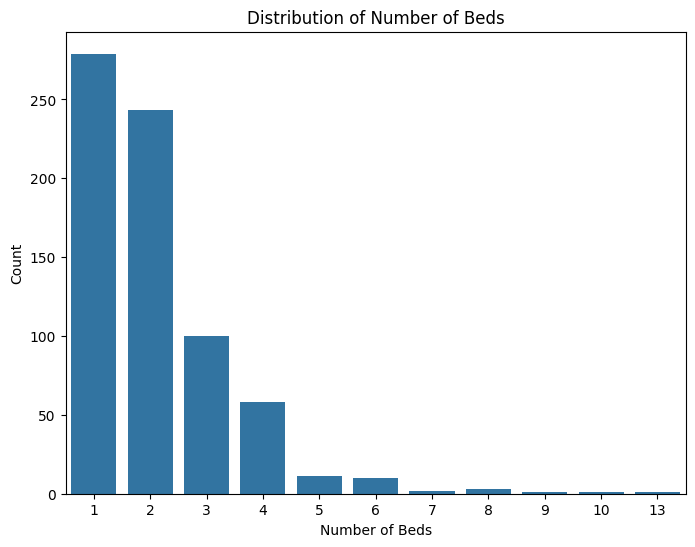

In [240]:
# Bar chart for 'Number of bed' distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Number of bed')
plt.title('Distribution of Number of Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Count')
plt.show()


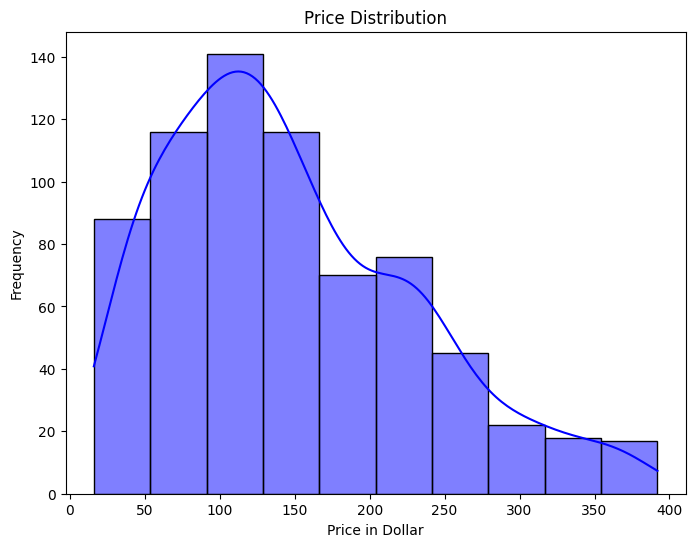

In [241]:
# Histogram for 'Price(in dollar)'
plt.figure(figsize=(8, 6))
sns.histplot(data['Price(in dollar)'], kde=True, bins=10, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price in Dollar')
plt.ylabel('Frequency')
plt.show()

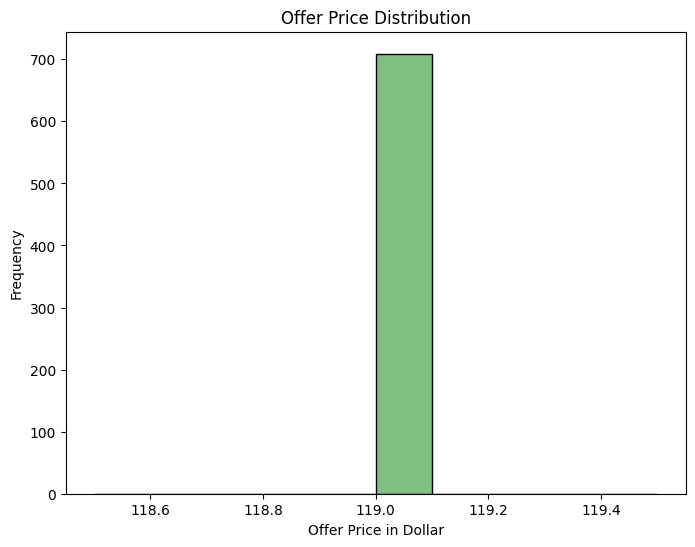

In [242]:
# Histogram for 'Offer price(in dollar)'
plt.figure(figsize=(8, 6))
sns.histplot(data['Offer price(in dollar)'], kde=True, bins=10, color='green')
plt.title('Offer Price Distribution')
plt.xlabel('Offer Price in Dollar')
plt.ylabel('Frequency')
plt.show()

# Correlation Heatmap for Numeric Features
A correlation heatmap is a great way to explore relationships between numeric features, especially when we have features like Price(in dollar), Offer price(in dollar), Rating , Number of bed.

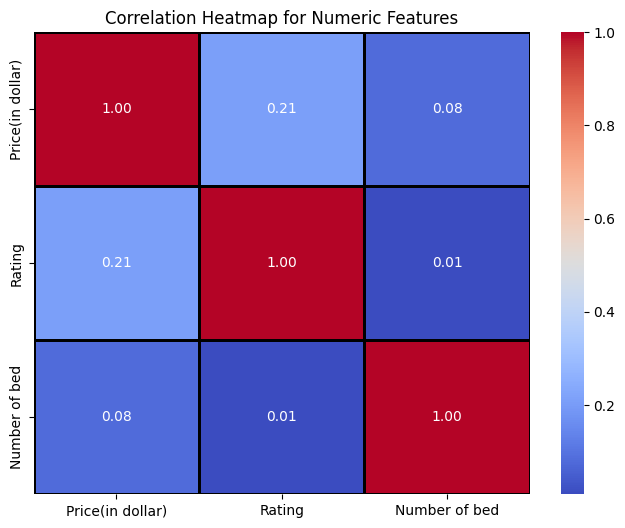

In [244]:
# Create a correlation matrix for numeric columns
numeric_columns = ['Price(in dollar)', 'Rating','Number of bed']
correlation_matrix = data[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Correlation Heatmap for Numeric Features')
plt.show()